In [35]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import time


In [36]:
# ocean_data=xr.open_dataset("/Users/loganknudsen/Documents/UMD_Research_Local_File_Saves/PSI_800k_run_no_b.nc")
ocean_data=xr.open_dataset("/Users/loganknudsen/Documents/UMD_Research_Local_File_Saves/psi_b_change_g_0_6.nc")
u = ocean_data.u+ocean_data.U
v = ocean_data.v+ocean_data.V
b = ocean_data.b+ocean_data.B

In [37]:
ocean_data.time

<xarray.DataArray 'time' (time: 1)>
array([0], dtype='timedelta64[ns]')
Coordinates:
  * time     (time) timedelta64[ns] 00:00:00
Attributes:
    longname:  Time

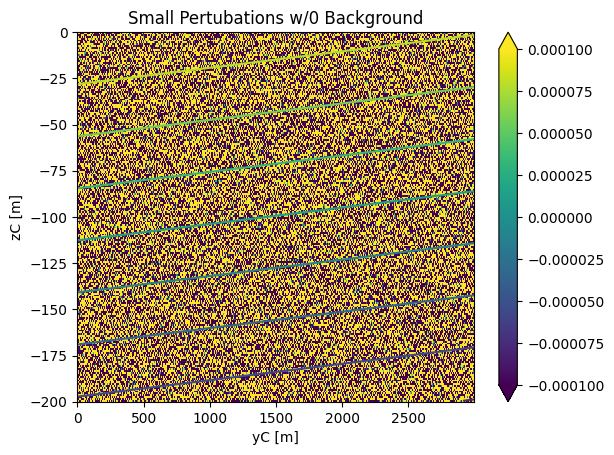

In [38]:
# vmin and vmax control colorbar range
# for i in range(len(ocean_data.time)):
# show timw -20, -25, -30, -35
q = -1
k = -4# order of magnitude
m = 1 # range number
v[q].plot(vmin=-m*10**(k),vmax=m*10**(k))
xr.plot.contour(b[q,:,:,0],levels=10)
plt.title("Small Pertubations w/0 Background")
plt.show()


b[1].plot()

In [39]:
t2 = 6
print(b[t2,-1,511,0])
print(b[0,-1,511,0])


IndexError: index 6 is out of bounds for axis 0 with size 1

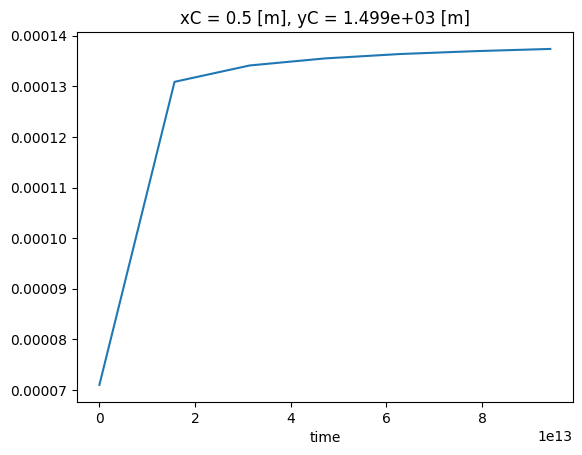

In [ ]:
((b[:,1,511,0]-b[:,0,511,0])/(1)).plot()

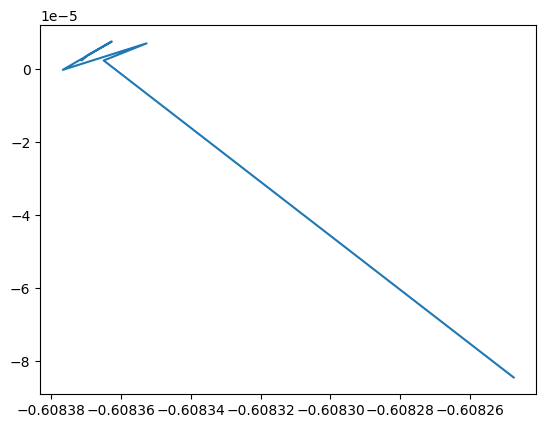

In [ ]:
plt.plot(u[:,100,511,0],v[:,100,511,0])

In [40]:
59000/((2*np.pi)/(10**(-4)))

0.9390141642421826

In [97]:
81.7*10**(-4)

0.00817